# Deep Learning Foundations

In [5]:
# Libraries
# Standard library imports
import os
import time

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Machine Learning - scikit-learn
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Deep Learning - TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10, fashion_mnist, imdb
from tensorflow.keras.layers import (
    BatchNormalization, Bidirectional, Conv2D, Conv2DTranspose, Dense,
    Dropout, Embedding, Flatten, GRU, Input, LeakyReLU, LSTM,
    MaxPooling2D, Reshape
)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model, to_categorical

## 1. Building a traditional Neural Network

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic data
X, y = make_classification(
    n_samples=1000,         # Total number of samples
    n_features=20,          # Number of features
    n_informative=10,       # Number of informative features
    n_redundant=5,          # Number of redundant features
    n_classes=3,            # Number of classes
    random_state=42
)

# Get dimensions for the model
num_features = X.shape[1]
num_classes = len(np.unique(y))

# Convert to one-hot encoding for categorical_crossentropy
y_onehot = tf.keras.utils.to_categorical(y, num_classes)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

NameError: name 'np' is not defined

In [ ]:
# Build a basic feed-forward neural network
model = Sequential([ #Creates an empty neural network model: Uses Sequential API, which allows building the network layer by layer in a linear stack

    # Input layer
    Dense(128, activation='relu', input_shape=(num_features,)), #Creates 128 neurons
    BatchNormalization(), #Stabilizes learning by keeping activations centered around zero with unit variance, Helps models train faster and reduces sensitivity to weight initialization
    Dropout(0.3), #Applies regularization: Randomly deactivates 30% of neurons during training, reduces overfitting,


    # Hidden layer
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3), #Forces the network to learn redundant representations

    # Output layer
    Dense(num_classes, activation='softmax') #Creates one neuron for each class in the classification problem
])

# Configure the learning process
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    X_train, y_train, #Training data and corresponding labels
    epochs=20, #Number of complete passes through the training dataset
    batch_size=32, #Number of samples processed before weight update
    validation_data=(X_val, y_val) #Separate dataset to monitor generalization during training
)

Epoch 1/20
25/25 [==============================] - 2s 16ms/step - loss: 1.3248 - accuracy: 0.4175 - val_loss: 0.9574 - val_accuracy: 0.5250
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.9255 - accuracy: 0.5788 - val_loss: 0.8254 - val_accuracy: 0.7000
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.8324 - accuracy: 0.6500 - val_loss: 0.7482 - val_accuracy: 0.7450
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.7565 - accuracy: 0.6600 - val_loss: 0.7006 - val_accuracy: 0.7550
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.7125 - val_loss: 0.6640 - val_accuracy: 0.7650
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.7088 - val_loss: 0.6250 - val_accuracy: 0.7650
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7600 - val_loss: 0.5879 - val_accuracy: 0.7750
Epoch 8/20
25/25 [=

In [ ]:
# Display text summary of model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2688      
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0

* Forward Pass: Data flows through network, generating predictions
* Loss Calculation: Compare predictions to actual targets
* Backward Pass: Compute gradients using backpropagation
* Parameter Update: Adjust weights and biases using optimizer
* Repeat: Iterate until convergence or for fixed number of epochs

#### Visualisation Example for publications

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model visualization saved as 'model_architecture.png'


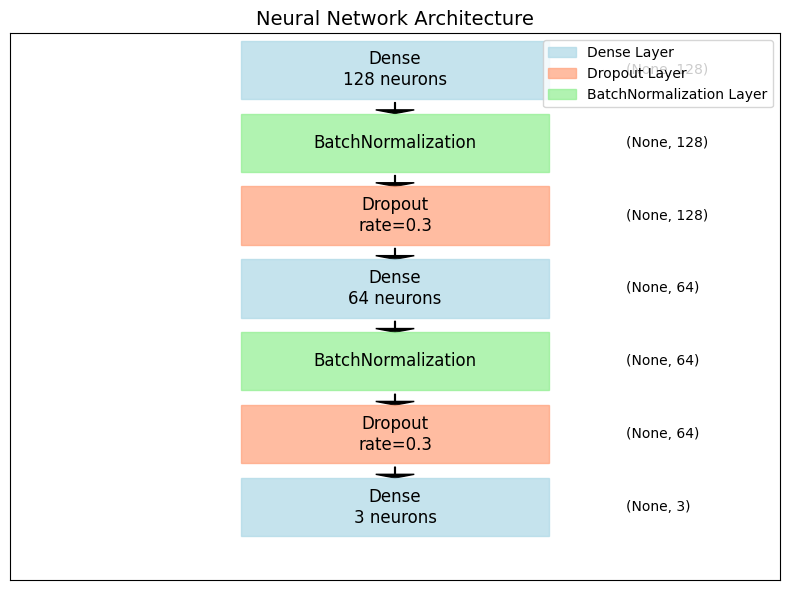

Model diagram saved as 'model_diagram.png'


In [ ]:
# Visualize model architecture (requires pydot and graphviz installed)
try:
    plot_model(
        model,
        to_file='model_architecture.png',
        show_shapes=True,
        show_layer_names=True,
        rankdir='TB'  # TB for top to bottom, LR for left to right
    )
    print("Model visualization saved as 'model_architecture.png'")
except Exception as e:
    print(f"Could not generate model visualization: {e}")
    print("To enable visualization, install: pip install pydot graphviz")

# Plot model architecture using matplotlib (alternative visualization)
def plot_model_architecture(model):
    # Get layer information
    layers = model.layers
    layer_types = [type(layer).__name__ for layer in layers]
    layer_shapes = [layer.output_shape for layer in layers]

    # Create plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Set up positions
    total_height = len(layers) * 2
    y_positions = np.arange(total_height, 0, -2)

    # Draw layers
    for i, (layer_type, shape) in enumerate(zip(layer_types, layer_shapes)):
        # Layer box
        if layer_type == 'Dense':
            color = 'lightblue'
            neurons = shape[1]
            label = f"{layer_type}\n{neurons} neurons"
        elif layer_type == 'Dropout':
            color = 'lightsalmon'
            rate = layers[i].rate
            label = f"{layer_type}\nrate={rate}"
        elif layer_type == 'BatchNormalization':
            color = 'lightgreen'
            label = f"{layer_type}"
        else:
            color = 'lightgray'
            label = layer_type

        # Draw layer box
        rect = plt.Rectangle((0.3, y_positions[i]-0.8), 0.4, 1.6, fill=True, color=color, alpha=0.7)
        ax.add_patch(rect)
        ax.text(0.5, y_positions[i], label, ha='center', va='center', fontsize=12)

        # Add shape information
        shape_text = str(shape)
        ax.text(0.8, y_positions[i], shape_text, ha='left', va='center', fontsize=10)

        # Connect layers with arrows
        if i < len(layers) - 1:
            ax.arrow(0.5, y_positions[i]-0.9, 0, -0.2, head_width=0.05, head_length=0.1, fc='black', ec='black')

    # Set axis limits and remove ticks
    ax.set_xlim(0, 1)
    ax.set_ylim(0, total_height + 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # Add title and labels
    plt.title('Neural Network Architecture', fontsize=14)

    # Legend
    handles = [
        plt.Rectangle((0, 0), 1, 1, color='lightblue', alpha=0.7),
        plt.Rectangle((0, 0), 1, 1, color='lightsalmon', alpha=0.7),
        plt.Rectangle((0, 0), 1, 1, color='lightgreen', alpha=0.7)
    ]
    labels = ['Dense Layer', 'Dropout Layer', 'BatchNormalization Layer']
    plt.legend(handles, labels, loc='upper right')

    plt.tight_layout()
    plt.savefig('model_diagram.png')
    plt.show()
    print("Model diagram saved as 'model_diagram.png'")

# Visualize model using matplotlib
plot_model_architecture(model)

## 2. DL for Supervised Learning

### CNN for Image Classification: Real-World Example with CIFAR-10

This example demonstrates a Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset, which contains 60,000 real-world images across 10 common object categories.

**Understanding the CNN Architecture** This CNN architecture follows a common pattern for image classification:
* Convolutional Blocks: Three blocks, each containing:
    * Conv2D layers that learn spatial features
    * BatchNormalization for training stability
    * MaxPooling to reduce spatial dimensions
    * Dropout for regularization
* Feature Hierarchy:
    * First block (32 filters): Basic features like edges, colors
    * Second block (64 filters): Intermediate features like textures, patterns
    * Third block (128 filters): Complex features like object parts
* Fully Connected Layers:
    * Flatten layer that converts 2D feature maps to 1D
    * Dense layer (512 neurons) that combines features
    * Output layer (10 neurons) that produces class probabilities

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


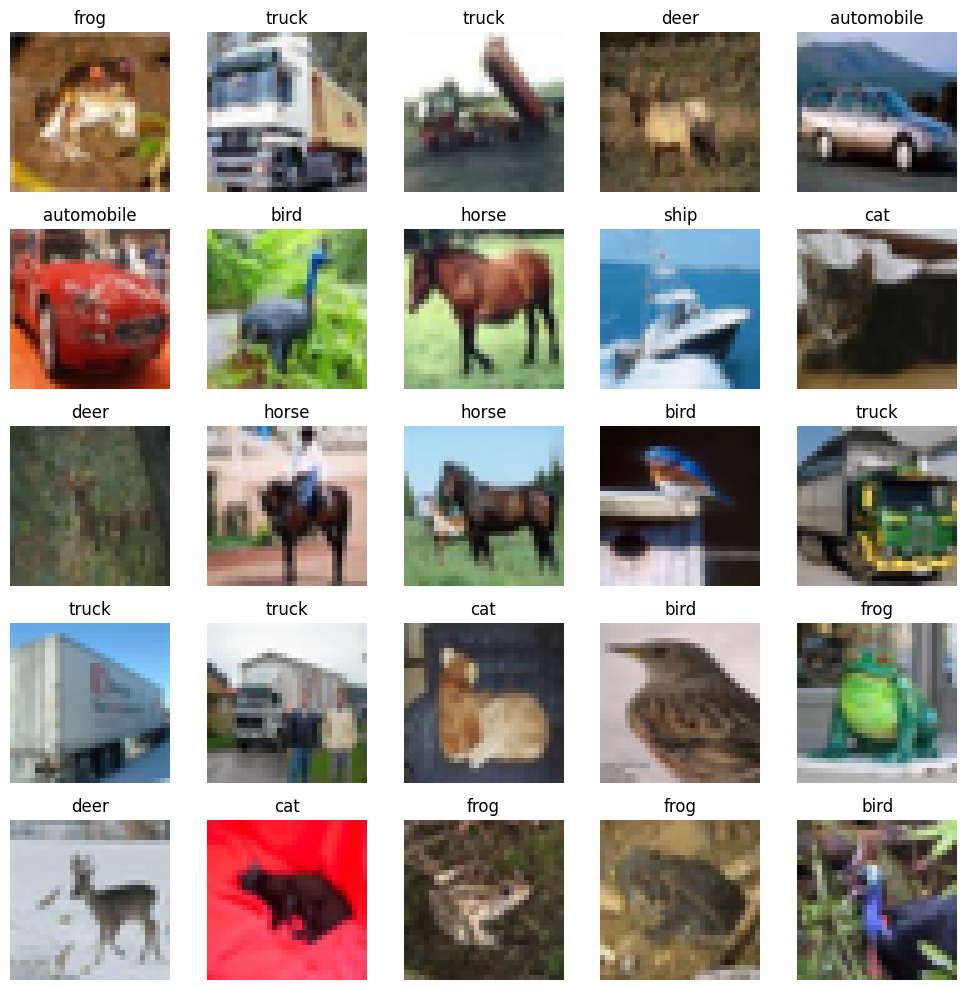

In [6]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Preprocessing: normalize pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualize some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.savefig('cifar10_samples.png')
plt.show()

In [7]:
# Build CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Model compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [8]:
# Visualize model architecture
try:
    from tensorflow.keras.utils import plot_model
    plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)
except Exception as e:
    print(f"Could not generate model visualization: {e}")

In [9]:
# Data augmentation to improve model generalization
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train)

# Create callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7040 - loss: 0.8498 - val_accuracy: 0.7109 - val_loss: 0.8596 - learning_rate: 0.0010
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7031 - loss: 0.8835 - val_accuracy: 0.7178 - val_loss: 0.8344 - learning_rate: 0.0010
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7187 - loss: 0.8151 - val_accuracy: 0.7158 - val_loss: 0.8671 - learning_rate: 0.0010
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7188 - loss: 0.7935 - val_accuracy: 0.7209 - val_loss: 0.8485 - learning_rate: 0.0010
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7351 - loss: 0.7573 - val_accuracy: 0.7483 - val_loss: 0.7466 - learning_rate: 0.0010
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7500 - loss: 0.5973 - val_accuracy: 0.7565 - val_loss: 0.7183 - learning_rate: 0.0010
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7539 - loss: 0

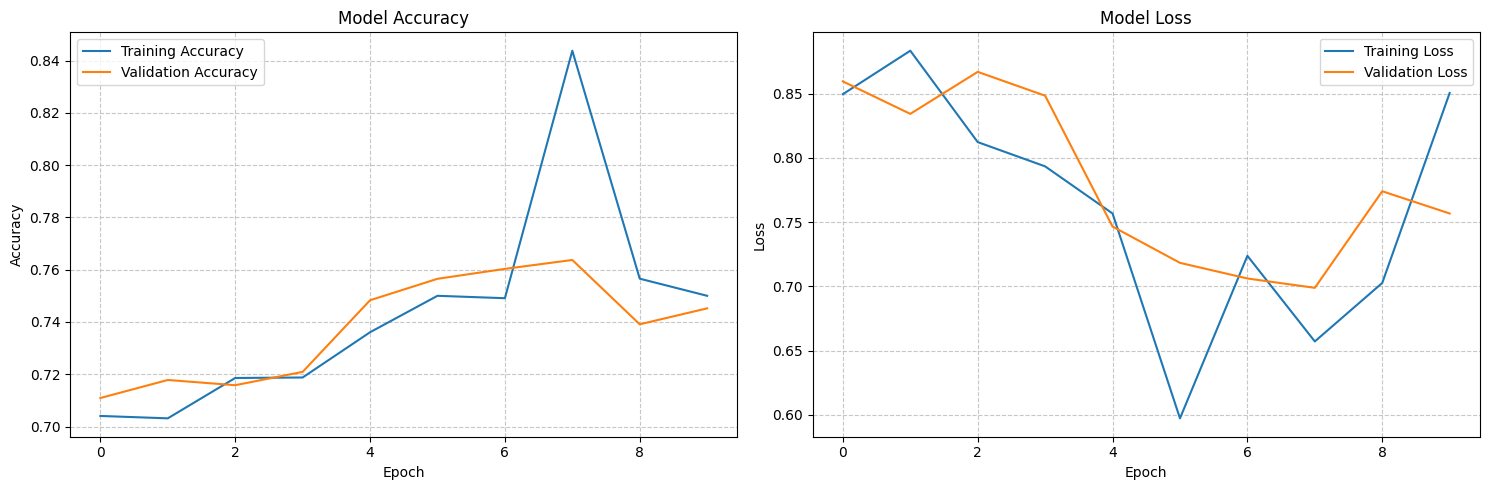

In [11]:
# Train the model with data augmentation
batch_size = 64
epochs = 10

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('cnn_training_history.png')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


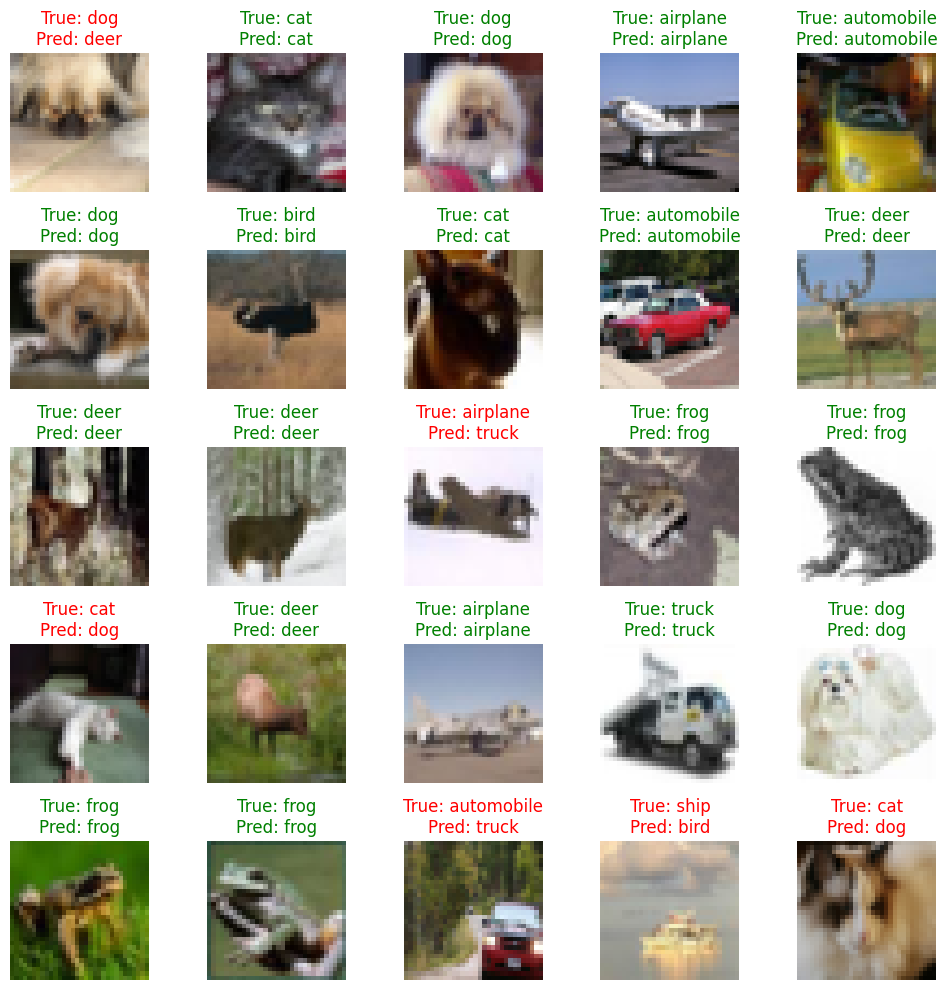

In [12]:
# Make predictions on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Visualize predictions
def plot_sample_predictions(X, y_true, y_pred, class_names, num_samples=25):
    """Plot sample predictions with correct and predicted labels."""
    indices = np.random.choice(range(len(X)), num_samples, replace=False)

    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i+1)
        plt.imshow(X[idx])

        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]

        # Green for correct predictions, red for wrong ones
        color = 'green' if true_label == pred_label else 'red'

        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('prediction_samples.png')
    plt.show()

# Visualize sample predictions
plot_sample_predictions(X_test, y_true_classes, y_pred_classes, class_names)

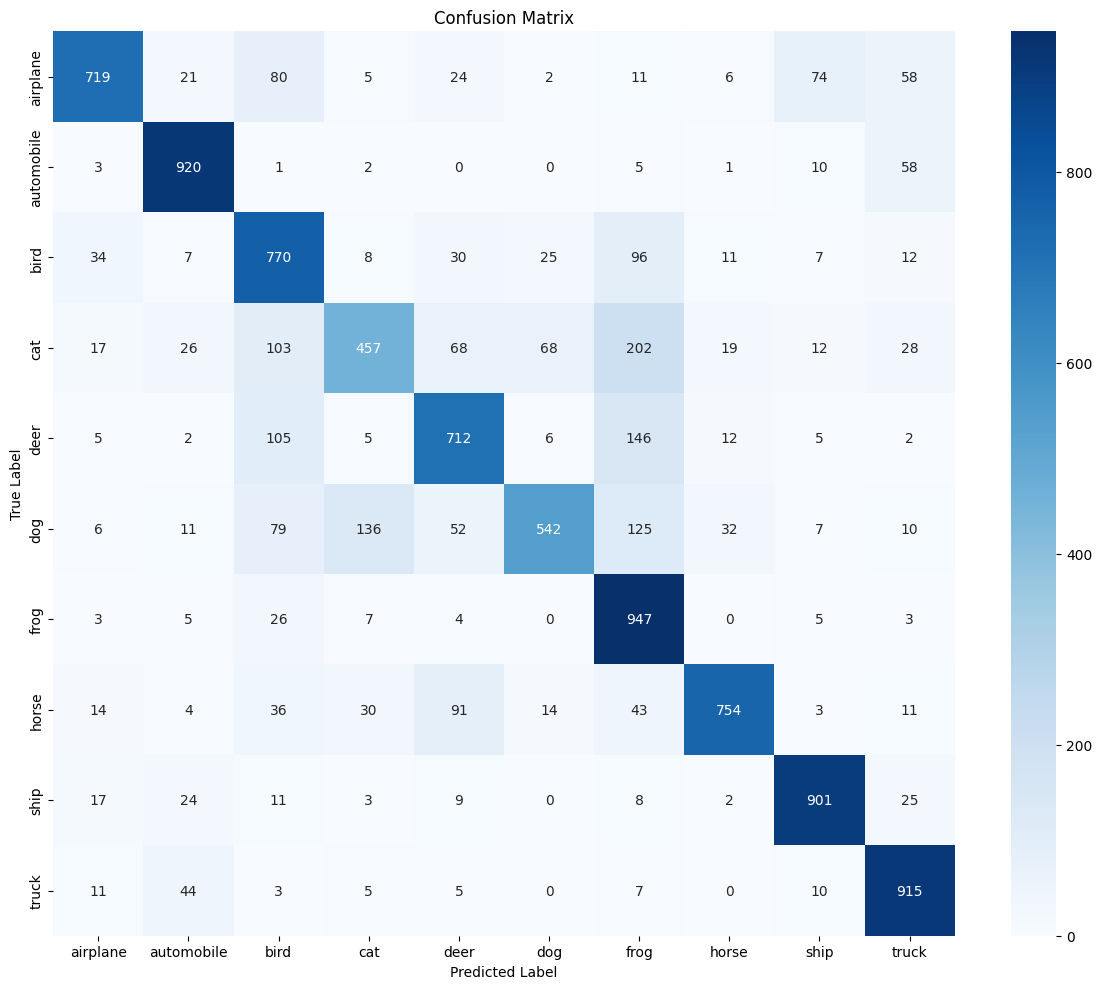

In [13]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

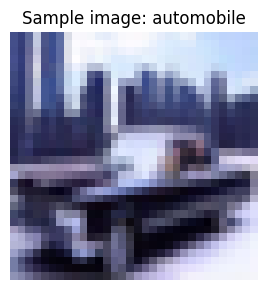

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


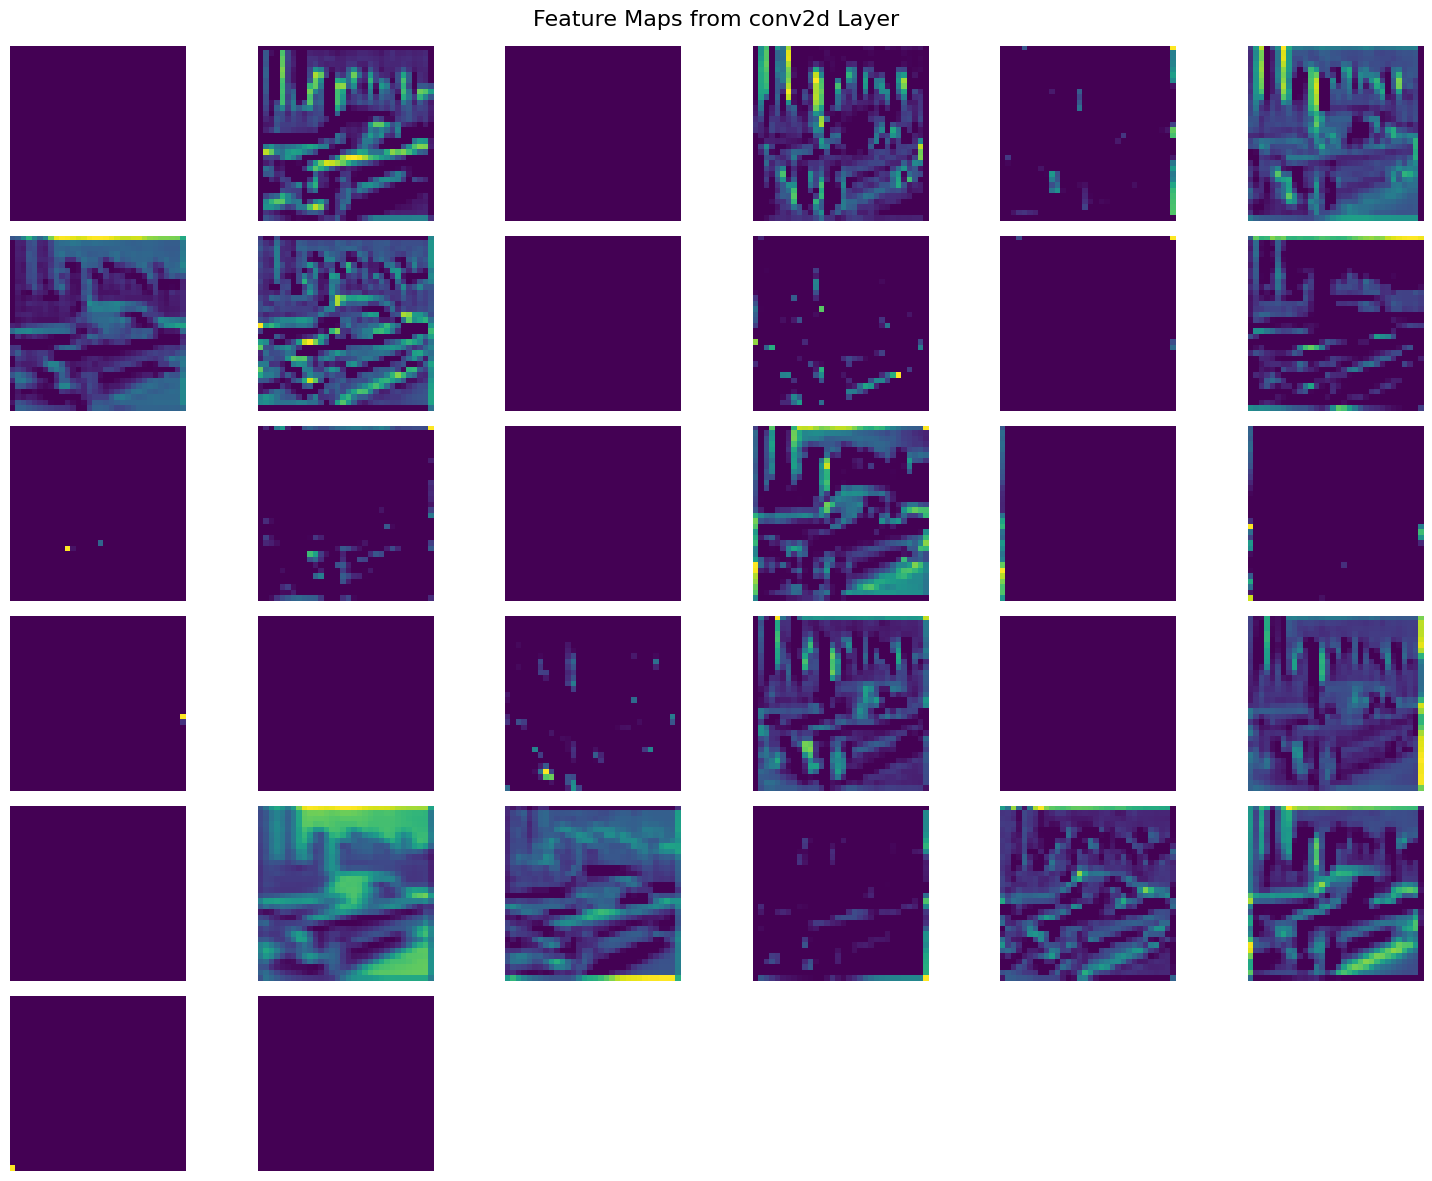

In [14]:
# Visualize feature maps
def visualize_feature_maps(model, img, layer_name):
    """Visualize feature maps from a specific convolutional layer."""
    # Create a model that will output the feature maps
    # FIX: Explicitly define the input layer for the feature_map_model
    # Use the same input shape as the original model
    input_img = tf.keras.Input(shape=img.shape)
    # Connect the input to the original model layers up to the desired layer
    output_of_layer = model.get_layer(layer_name)(input_img)

    feature_map_model = tf.keras.models.Model(
        inputs=input_img, # Use the explicitly defined input layer
        outputs=output_of_layer # Use the output from the specified layer
    )

    # Get feature maps for the input image
    img = np.expand_dims(img, axis=0)
    feature_maps = feature_map_model.predict(img)

    # Determine grid size
    n_features = feature_maps.shape[-1]
    # Ensure grid size doesn't exceed available features (especially if breaking at 64)
    grid_size = int(np.ceil(np.sqrt(min(n_features, 64))))


    # Plot feature maps
    plt.figure(figsize=(15, 12))

    for i in range(min(n_features, 64)):  # Limit to 64 feature maps for readability
        plt.subplot(grid_size, grid_size, i+1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.suptitle(f'Feature Maps from {layer_name} Layer', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig(f'feature_maps_{layer_name}.png')
    plt.show()

# Choose a sample image
sample_img_idx = np.random.choice(len(X_test))
sample_img = X_test[sample_img_idx]
sample_label = class_names[y_true_classes[sample_img_idx]]

# Display the sample image
plt.figure(figsize=(3, 3))
plt.imshow(sample_img)
plt.title(f"Sample image: {sample_label}")
plt.axis('off')
plt.tight_layout()
plt.show()

# Visualize feature maps from the first convolutional layer
visualize_feature_maps(model, sample_img, 'conv2d')

### RNN for Sentiment Analysis: IMDb Movie Reviews Classification

This example demonstrates how to use Recurrent Neural Networks (RNNs) for text classification, specifically sentiment analysis on movie reviews. I'll use the IMDb dataset, which contains 50,000 movie reviews labeled as positive or negative.
**The RNN Architecture**
The model architecture has three main components:
* Embedding Layer:
    * Converts word indices to dense vectors (100 dimensions per word)
    * Learns to place semantically similar words close together in the embedding space
* RNN Layer (LSTM/GRU):
    * Processes embedded words sequentially
    * LSTM (Long Short-Term Memory): Uses gates to control information flow
    * GRU (Gated Recurrent Unit): Simpler variant with fewer parameters
    * Bidirectional: Processes sequence both forward and backward
* Output Layer:
    * Takes the final RNN state and predicts sentiment (positive/negative)
    * Uses sigmoid activation for binary classification

In [6]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load IMDb dataset (use only top 10,000 most frequent words)
max_features = 10000
print("Loading data...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Print basic dataset information
print(f"Training data shape: {len(X_train)} reviews")
print(f"Testing data shape: {len(X_test)} reviews")
print(f"Label distribution - Training: {np.bincount(y_train)}")  # [Negative, Positive]
print(f"Label distribution - Testing: {np.bincount(y_test)}")    # [Negative, Positive]

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: 25000 reviews
Testing data shape: 25000 reviews
Label distribution - Training: [12500 12500]
Label distribution - Testing: [12500 12500]


In [7]:
# Look at sequence length statistics
review_lengths = [len(x) for x in X_train]
print(f"Average review length: {np.mean(review_lengths):.2f} words")
print(f"Median review length: {np.median(review_lengths):.2f} words")
print(f"Max review length: {np.max(review_lengths)} words")
print(f"Min review length: {np.min(review_lengths)} words")

Average review length: 238.71 words
Median review length: 178.00 words
Max review length: 2494 words
Min review length: 11 words


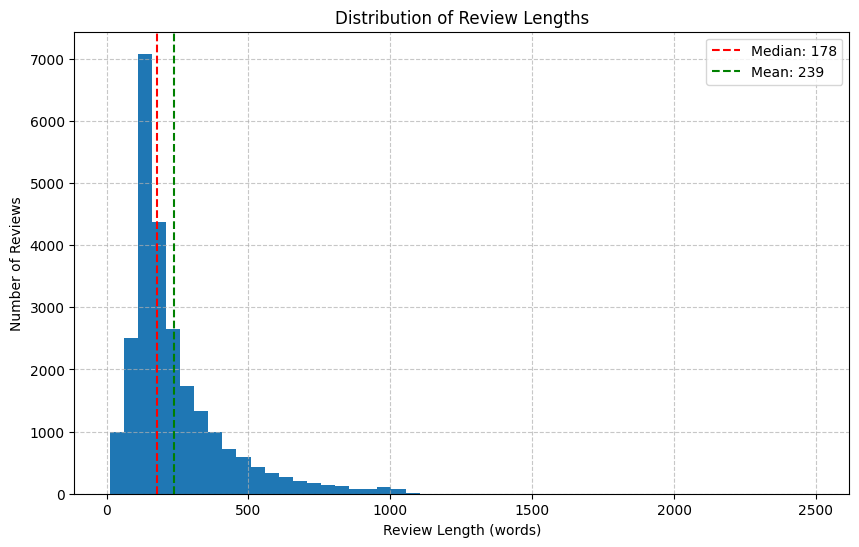

In [8]:
# Plot review length distribution
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length (words)')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.axvline(np.median(review_lengths), color='r', linestyle='--', label=f'Median: {np.median(review_lengths):.0f}')
plt.axvline(np.mean(review_lengths), color='g', linestyle='--', label=f'Mean: {np.mean(review_lengths):.0f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('review_length_distribution.png')
plt.show()

In [9]:
# Set parameters
maxlen = 200  # Maximum review length (in words)
batch_size = 64
embedding_dims = 100

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(f"Training data shape after padding: {X_train.shape}")
print(f"Testing data shape after padding: {X_test.shape}")

Training data shape after padding: (25000, 200)
Testing data shape after padding: (25000, 200)


In [10]:
# Get word index and reverse it to decode reviews
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to decode a review
def decode_review(encoded_review):
    # Note: 0, 1, and 2 are reserved indices for padding, start, and unknown
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review if i > 2])

# Print a sample review
sample_review_idx = 10
print("Sample review:")
print(decode_review(X_train[sample_review_idx]))
print(f"Sentiment: {'Positive' if y_train[sample_review_idx] == 1 else 'Negative'}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Sample review:
feels restrained and manages to flow well throughout director eric provides a great atmosphere for the film the fact that most of it takes place inside the central prison cell that the film feels very claustrophobic and this immensely benefits the central idea of the prisoners wanting to use magic to break out of the cell it's very easy to get behind them it's often said that the unknown is the thing that really people and this film proves that as the director that we can never really be sure of exactly what is round the corner and this helps to ensure that actually does manage to be quite frightening the film is memorable for a lot of reasons outside the central plot the characters are all very interesting in their own way and the fact that the book itself almost takes on its own character is very well done anyone worried that the film won't deliver by the end won't be disappointed either as the ending both makes sense an

In [11]:
# Function to build and train an RNN model
def build_rnn_model(rnn_type='LSTM', bidirectional=False):
    model = Sequential()

    # Embedding layer: Maps word indices to dense vectors
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))

    # RNN layer (LSTM or GRU)
    if rnn_type == 'LSTM':
        rnn_layer = LSTM(128, dropout=0.2, recurrent_dropout=0.2)
    else:  # GRU
        rnn_layer = GRU(128, dropout=0.2, recurrent_dropout=0.2)

    # Add bidirectional wrapper if requested
    if bidirectional:
        model.add(Bidirectional(rnn_layer))
    else:
        model.add(rnn_layer)

    # Output layers
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [12]:
# Build models to compare: LSTM, GRU, and Bidirectional LSTM
models = {
    'LSTM': build_rnn_model('LSTM', bidirectional=False),
    'GRU': build_rnn_model('GRU', bidirectional=False),
    'Bidirectional LSTM': build_rnn_model('LSTM', bidirectional=True)
}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Choose one model to train fully (for this example, we'll use Bidirectional LSTM)
chosen_model_name = 'Bidirectional LSTM'
model = models[chosen_model_name]

# Display model summary
model.summary()

# Plot model architecture
try:
    plot_model(model, to_file='bidirectional_lstm_architecture.png', show_shapes=True, show_layer_names=True)
    print("Model architecture saved as 'bidirectional_lstm_architecture.png'")
except Exception as e:
    print(f"Could not generate model visualization: {e}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Could not generate model visualization: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.


In [14]:
# Set up callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_rnn_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
print(f"Training {chosen_model_name} model...")
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Training Bidirectional LSTM model...
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6652 - loss: 0.5925
Epoch 1: val_accuracy improved from -inf to 0.65660, saving model to best_rnn_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.6654 - loss: 0.5923 - val_accuracy: 0.6566 - val_loss: 0.6118
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7937 - loss: 0.4564
Epoch 2: val_accuracy improved from 0.65660 to 0.84900, saving model to best_rnn_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.7938 - loss: 0.4562 - val_accuracy: 0.8490 - val_loss: 0.3666
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8679 - loss: 0.3284
Epoch 3: val_accuracy did not improve from 0.84900
313/313 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.8679 - loss: 0.3283 - val_accuracy: 0.8362 - val_loss: 0.3757
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8807 - loss: 0.2942
Epoch 4: val_accuracy did not improve from 0.84900
313/313 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.8807 - loss: 0.2941 - val_accuracy: 0.8426 - val_loss: 0.3829
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9071 - loss: 0.2459
Epoch 5: val_accuracy did not improve from 0.84900
313/313 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.9072 - loss: 0.2458 - val_accuracy: 0.8458 - val_loss: 0.3796


In [15]:
# Load the best model
model.load_weights('best_rnn_model.h5')

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

Test accuracy: 0.8457
782/782 ━━━━━━━━━━━━━━━━━━━━ 164s 208ms/step


In [16]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.83      0.84     12500
    Positive       0.83      0.86      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [17]:
# Plot training history
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

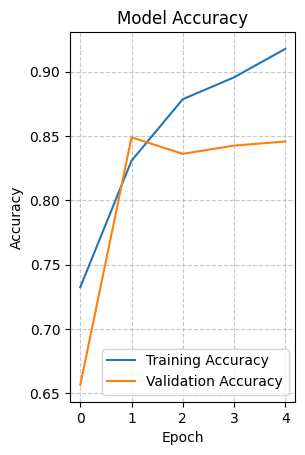

In [18]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

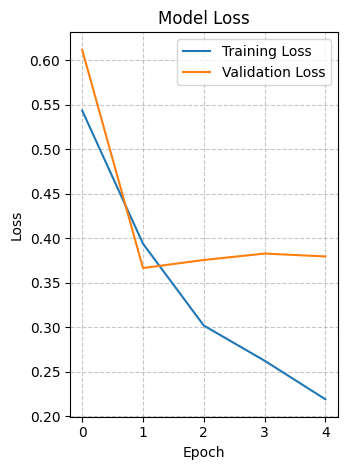

In [19]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('rnn_training_history.png')
plt.show()

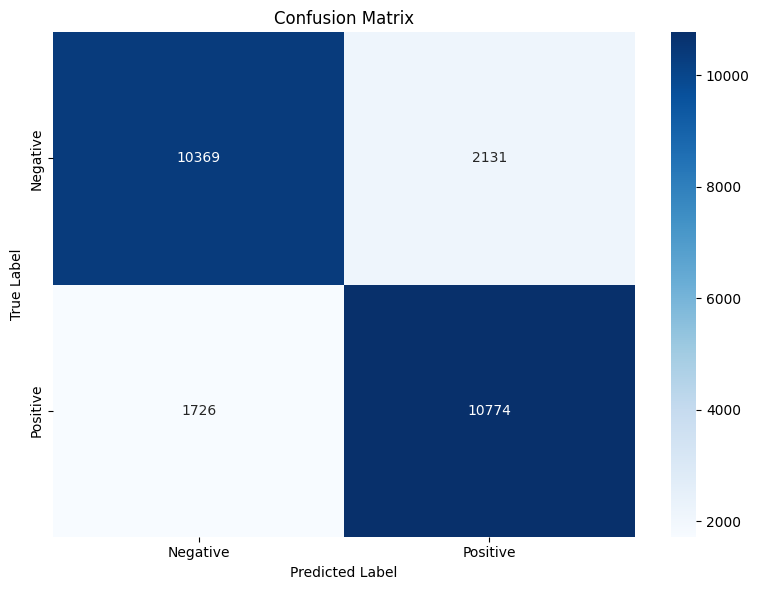

In [20]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

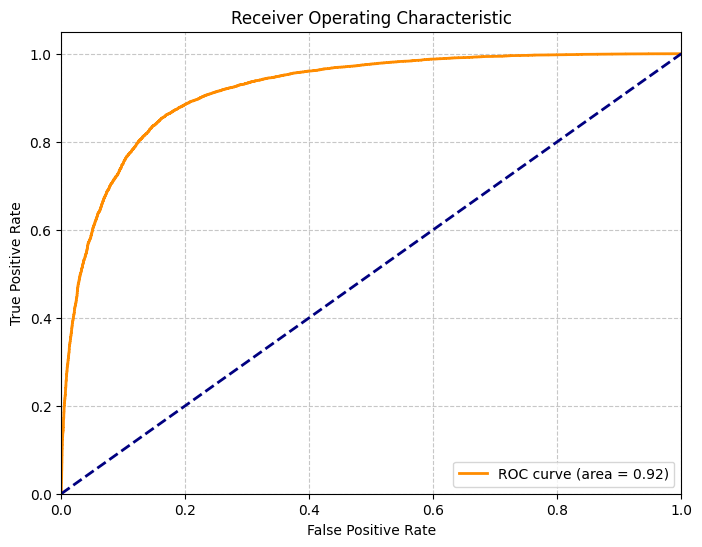

In [21]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('roc_curve.png')
plt.show()

In [22]:
# Visualize model's attention to words: Analyze how RNNs process sequences
def visualize_word_importance(model, text, sentiment):
    """
    Visualize which words in a review contribute most to the sentiment prediction.
    This is a simplified approach that looks at the change in prediction when words are removed.
    """
    # Tokenize the input text
    word_index = imdb.get_word_index()
    words = text.lower().split()
    sequence = []

    for word in words:
        if word in word_index and word_index[word] < max_features:
            sequence.append(word_index[word] + 3)  # +3 due to reserved indices
        else:
            sequence.append(2)  # Unknown word

    if len(sequence) > maxlen:
        sequence = sequence[:maxlen]
    else:
        sequence = [0] * (maxlen - len(sequence)) + sequence  # Pad

    # Get baseline prediction
    baseline_pred = model.predict(np.array([sequence]))[0][0]

    # Check impact of each word
    word_importance = []

    # Skip padding tokens
    actual_words = [i for i, token in enumerate(sequence) if token != 0]

    for i in actual_words:
        # Make a copy and mask the word
        modified_sequence = sequence.copy()
        modified_sequence[i] = 0

        # Get new prediction
        new_pred = model.predict(np.array([modified_sequence]))[0][0]

        # Calculate importance as change in prediction
        importance = abs(baseline_pred - new_pred)
        word_importance.append((i, importance))

    # Sort by importance
    word_importance.sort(key=lambda x: x[1], reverse=True)

    # Get top important words
    top_indices = [idx for idx, _ in word_importance[:10]]

    # Create visualization
    plt.figure(figsize=(14, 7))

    # Convert sequence back to words
    word_list = []
    for token in sequence:
        if token > 2:  # Skip padding, start, and unknown
            word_list.append(reverse_word_index.get(token - 3, '?'))
        elif token == 0:
            word_list.append("[PAD]")
        elif token == 2:
            word_list.append("[UNK]")

    # Plot word importance
    importance_values = [0] * len(sequence)
    for idx, imp in word_importance:
        importance_values[idx] = imp

    # Only show non-padding words
    words_to_show = [word for i, word in enumerate(word_list) if i in actual_words]
    importances_to_show = [importance_values[i] for i in actual_words]

    # Create horizontal bar chart
    plt.barh(range(len(words_to_show)), importances_to_show, align='center')
    plt.yticks(range(len(words_to_show)), words_to_show)
    plt.xlabel('Importance (Change in prediction)')
    plt.title(f'Word Importance for {"Positive" if sentiment == 1 else "Negative"} Review')
    plt.tight_layout()
    plt.savefig('word_importance.png')
    plt.show()

    # Print text with highlighting
    print("Review with important words highlighted:")
    print()

    highlight_text = ""
    for i, word in enumerate(word_list):
        if i in top_indices:
            highlight_text += f"*{word}* "
        elif word != "[PAD]":
            highlight_text += f"{word} "

    print(highlight_text)
    print(f"\nPredicted sentiment: {'Positive' if baseline_pred > 0.5 else 'Negative'} ({baseline_pred:.4f})")
    print(f"Actual sentiment: {'Positive' if sentiment == 1 else 'Negative'}")

In [23]:
# Find a sample review that the model predicted correctly
for i in range(len(X_test)):
    if y_pred[i] == y_test[i]:
        sample_idx = i
        break

# Get the text of this review
sample_text = decode_review(X_test[sample_idx])
sample_sentiment = y_test[sample_idx]

# Display the sample review
print(f"\nSample {'Positive' if sample_sentiment == 1 else 'Negative'} Review:")
print(sample_text[:500] + "..." if len(sample_text) > 500 else sample_text)


Sample Negative Review:
please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

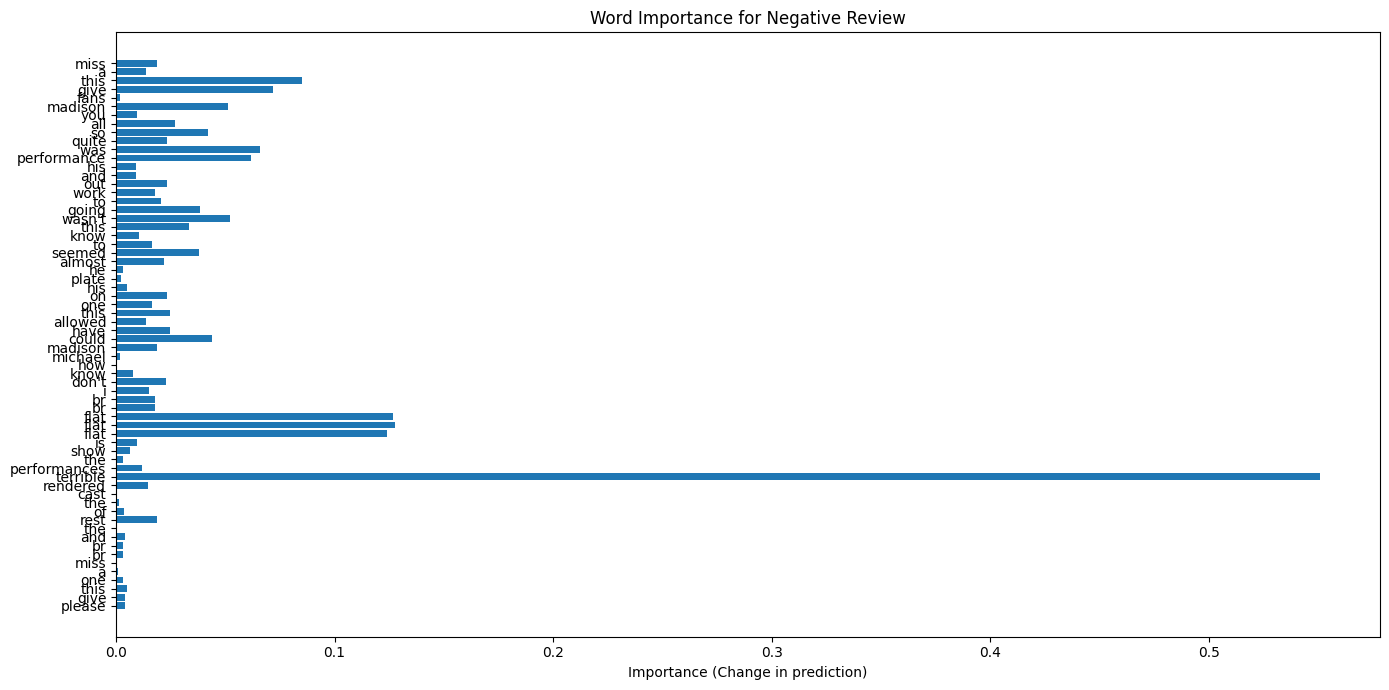

Review with important words highlighted:

please give this one a miss br br and the rest of the cast rendered *terrible* performances the show is *flat* *flat* *flat* br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this *wasn't* going to work out and his *performance* *was* quite so all you *madison* fans *give* *this* a miss 

Predicted sentiment: Negative (0.1968)
Actual sentiment: Negative


In [24]:
# Visualize word importance
visualize_word_importance(model, sample_text, sample_sentiment)

# Demonstrate RNN Sequential Processing
def visualize_sequential_processing(text, sentiment, rnn_model):
    """Visualize how an RNN processes text one word at a time."""
    # Tokenize and prepare input
    word_index = imdb.get_word_index()
    words = text.lower().split()[:50]  # Take first 50 words for visualization
    processed_words = []

    for word in words:
        if word in word_index and word_index[word] < max_features:
            processed_words.append((word, word_index[word] + 3))
        else:
            processed_words.append((word, 2))  # Unknown word

    # Prepare for sequential prediction
    predictions = []
    sequence = [0] * maxlen  # Start with all padding

    for i, (word, token) in enumerate(processed_words):
        # Update sequence by shifting and adding the token
        sequence = sequence[1:] + [token]

        # Get prediction
        pred = rnn_model.predict(np.array([sequence]))[0][0]
        predictions.append((word, pred))

    # Visualize predictions
    plt.figure(figsize=(14, 7))

    words = [word for word, _ in predictions]
    preds = [pred for _, pred in predictions]

    # Plot sentiment evolution
    plt.plot(range(len(preds)), preds, marker='o', linestyle='-', color='blue')
    plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary')

    # Highlight prediction changes
    for i in range(1, len(preds)):
        if (preds[i] > 0.5 and preds[i-1] <= 0.5) or (preds[i] <= 0.5 and preds[i-1] > 0.5):
            plt.axvline(x=i, color='g', linestyle=':', alpha=0.5)

    # Add word labels to x-axis (skip some for readability)
    step = max(1, len(words) // 20)
    plt.xticks(range(0, len(words), step), [words[i] for i in range(0, len(words), step)], rotation=45)

    plt.ylim(0, 1)
    plt.xlabel('Words in Sequence')
    plt.ylabel('Sentiment Probability (Positive)')
    plt.title('Evolution of Sentiment Prediction as Words are Processed')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('sequential_processing.png')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

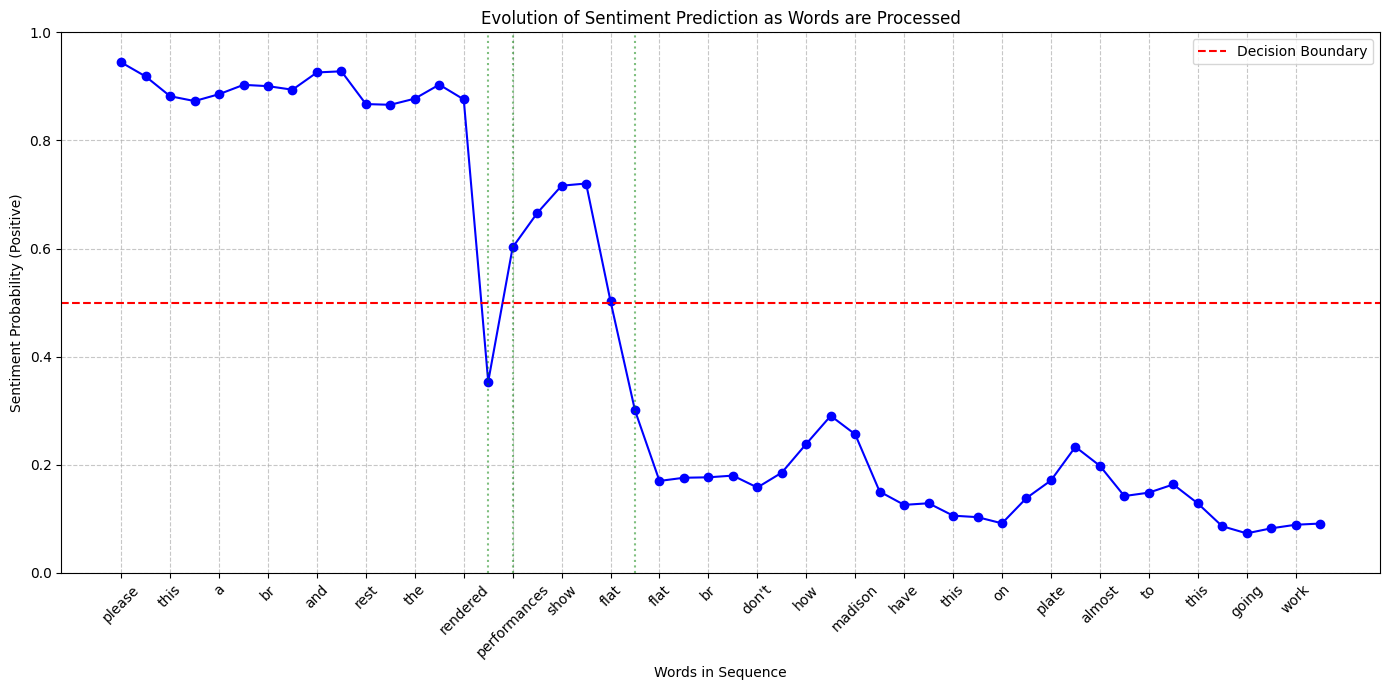

In [25]:
# Visualize sequential processing
visualize_sequential_processing(sample_text, sample_sentiment, model)

## 3. DL for unsupervsied Learning

### GANs for Fashion Image Generation: A Real-World Application

This example demonstrates how to implement a Generative Adversarial Network (GAN) to generate fashion items using the Fashion-MNIST dataset, with applications to the retail industry.
2. Generator Architecture
The generator transforms random noise into fashion images through:

Dense Layer: Maps random noise to a high-dimensional space (7×7×256)
Upsampling Layers: Uses transposed convolutions to increase spatial dimensions

$7×7 → 14×14 → 28×28$


Batch Normalization: Stabilizes training by normalizing layer activations
LeakyReLU Activation: Allows for better gradient flow
Tanh Output: Produces final images with pixel values in range $\[-1, 1\]$

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create directory for saving results
os.makedirs('gan_results', exist_ok=True)

# Load Fashion-MNIST dataset
print("Loading Fashion-MNIST dataset...")
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize images to [-1, 1]
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_test = (x_test.astype('float32') - 127.5) / 127.5

# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

# Visualize some fashion items
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.savefig('gan_results/fashion_samples.png')
plt.show()

# Set parameters
latent_dim = 100  # Dimensionality of the latent space
img_shape = (28, 28, 1)  # Shape of Fashion-MNIST images

# Build the generator model
def build_generator():
    model = Sequential([
        # Start with a fully connected layer
        Dense(7*7*256, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),

        # Reshape to 7x7x256
        Reshape((7, 7, 256)),

        # Upsample to 14x14
        Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),

        # Upsample to 28x28
        Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),

        # Output layer with tanh activation (for [-1, 1] range)
        Conv2D(1, kernel_size=3, padding='same', activation='tanh')
    ])

    # Print a summary of the generator model
    model.summary()
    return model

# Build the discriminator model
def build_discriminator():
    model = Sequential([
        # First convolutional layer
        Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=img_shape),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),

        # Second convolutional layer
        Conv2D(128, kernel_size=3, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),

        # Flatten and output layer
        Flatten(),
        Dense(1, activation='sigmoid')  # Binary classification: real or fake
    ])

    # Print a summary of the discriminator model
    model.summary()
    return model

# Construct and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(
    optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Build and compile the combined GAN model
generator = build_generator()

# For the combined model, we only train the generator
discriminator.trainable = False

# Connect the generator and discriminator
z = Input(shape=(latent_dim,))
img = generator(z)
validity = discriminator(img)

# Combined model (stacked generator and discriminator)
combined = Model(z, validity)
combined.compile(
    optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy'
)


# Training function
def train_gan(epochs, batch_size=128, sample_interval=50):
    # Ground truths for adversarial loss
    valid = np.ones((batch_size, 1))  # Label for real images
    fake = np.zeros((batch_size, 1))  # Label for fake images

    # Lists to store loss and accuracy values
    d_losses = []
    g_losses = []
    d_accs = []

    for epoch in range(epochs):
        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random batch of real images
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_imgs = x_train[idx]

        # Generate a batch of fake images
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_imgs = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, valid)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        # Generate new noise samples
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Train the generator (wants discriminator to mistake fake as real)
        g_loss = combined.train_on_batch(noise, valid)

        # Store loss and accuracy
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)
        d_accs.append(100 * d_loss[1])

        # Print progress
        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

            # Save generated images
            sample_images(epoch)

            # Plot loss and accuracy
            plot_loss_and_accuracy(d_losses, g_losses, d_accs, epoch)

    return d_losses, g_losses, d_accs

# Function to generate and save images
def sample_images(epoch, samples=5*5):
    # Generate random noise
    noise = np.random.normal(0, 1, (samples, latent_dim))

    # Generate images from the noise
    gen_imgs = generator.predict(noise)

    # Rescale images to 0-255
    gen_imgs = (0.5 * gen_imgs + 0.5) * 255
    gen_imgs = gen_imgs.astype(np.uint8)

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    for i in range(samples):
        plt.subplot(5, 5, i+1)
        plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Generated Fashion Items (Epoch {epoch})", fontsize=16)
    plt.tight_layout()
    plt.savefig(f'gan_results/fashion_gan_epoch_{epoch}.png')
    plt.close()

# Function to plot loss and accuracy
def plot_loss_and_accuracy(d_losses, g_losses, d_accs, epoch):
    plt.figure(figsize=(15, 5))

    # Plot discriminator and generator loss
    plt.subplot(1, 2, 1)
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generator Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Plot discriminator accuracy
    plt.subplot(1, 2, 2)
    plt.plot(d_accs, label='Discriminator Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.suptitle(f"Training Metrics (Epoch {epoch})", fontsize=16)
    plt.tight_layout()
    plt.savefig(f'gan_results/fashion_gan_metrics_epoch_{epoch}.png')
    plt.close()

# Generate a grid of interpolated samples
def generate_interpolated_images(n_rows=5, n_cols=10):
    """Generate a grid of images by interpolating between points in latent space."""
    # Create two random noise vectors
    z1 = np.random.normal(0, 1, (n_rows, latent_dim))
    z2 = np.random.normal(0, 1, (n_rows, latent_dim))

    plt.figure(figsize=(20, 10))

    # Generate interpolated points and corresponding images
    for row in range(n_rows):
        for col in range(n_cols):
            # Linear interpolation between z1 and z2
            alpha = col / (n_cols - 1)
            z_interp = (1 - alpha) * z1[row] + alpha * z2[row]

            # Reshape for prediction
            z_interp = z_interp.reshape(1, latent_dim)

            # Generate image
            img = generator.predict(z_interp)
            img = 0.5 * img[0] + 0.5  # Scale from [-1, 1] to [0, 1]

            # Plot the image
            plt.subplot(n_rows, n_cols, row * n_cols + col + 1)
            plt.imshow(img[:, :, 0], cmap='gray')
            plt.axis('off')

    plt.suptitle("Latent Space Interpolation (From Left to Right)", fontsize=16)
    plt.tight_layout()
    plt.savefig('gan_results/fashion_gan_interpolation.png')
    plt.show()

# Visualize latent space vectors for style manipulation
def visualize_latent_space_features(n_components=5, n_samples=10):
    """Visualize how different dimensions of the latent space affect the generated images."""
    # Create a base random vector
    z_base = np.random.normal(0, 1, (1, latent_dim))

    plt.figure(figsize=(20, 4 * n_components))

    for i in range(n_components):
        # Create copies of the base vector
        z_vectors = np.tile(z_base, (n_samples, 1))

        # Vary one component from -3 to +3
        values = np.linspace(-3, 3, n_samples)

        for j in range(n_samples):
            z_vectors[j, i] = values[j]

        # Generate images
        gen_imgs = generator.predict(z_vectors)
        gen_imgs = 0.5 * gen_imgs + 0.5  # Scale to [0, 1]

        # Plot the images
        for j in range(n_samples):
            plt.subplot(n_components, n_samples, i * n_samples + j + 1)
            plt.imshow(gen_imgs[j, :, :, 0], cmap='gray')

            if j == 0:
                plt.ylabel(f"Dim {i}", fontsize=14)

            if i == 0:
                plt.title(f"{values[j]:.1f}", fontsize=10)

            plt.axis('off')

    plt.suptitle("Effect of Individual Latent Space Dimensions", fontsize=16)
    plt.tight_layout()
    plt.savefig('gan_results/fashion_gan_latent_features.png')
    plt.show()

# Train the GAN
print("Training GAN...")
epochs = 500  # Reduced for demonstration; use 5000+ for better results
d_losses, g_losses, d_accs = train_gan(
    epochs=epochs,
    batch_size=128,
    sample_interval=100
)

# Generate and visualize interpolated images
print("Generating interpolated images...")
generate_interpolated_images()

# Visualize latent space features
print("Visualizing latent space features...")
visualize_latent_space_features()

# Create a fashion item evolution animation
def create_fashion_evolution_animation(frames=50):
    """Generate a sequence of images showing the evolution of the generator."""
    print("Creating fashion evolution animation...")

    # Create a fixed noise vector
    fixed_noise = np.random.normal(0, 1, (25, latent_dim))

    # Create a GIF animation showing fashion evolution
    from matplotlib.animation import FuncAnimation, PillowWriter

    fig, axs = plt.subplots(5, 5, figsize=(10, 10))
    axs = axs.flatten()

    # Initialize with black images
    imgs = []
    for ax in axs:
        img = ax.imshow(np.zeros((28, 28)), cmap='gray', vmin=0, vmax=1)
        ax.axis('off')
        imgs.append(img)

    # Animation update function
    def update(frame):
        # Interpolate between random noise and final noise
        alpha = frame / (frames - 1)
        current_noise = fixed_noise * alpha + np.random.normal(0, 1, (25, latent_dim)) * (1-alpha)

        # Generate images
        gen_imgs = generator.predict(current_noise)
        gen_imgs = 0.5 * gen_imgs + 0.5  # Scale to [0, 1]

        # Update images
        for i, img in enumerate(imgs):
            img.set_array(gen_imgs[i, :, :, 0])

        plt.suptitle(f"Fashion GAN Evolution (Frame {frame+1}/{frames})", fontsize=16)
        return imgs

    # Create animation
    anim = FuncAnimation(fig, update, frames=frames, interval=100)

    # Save as GIF
    writer = PillowWriter(fps=10)
    anim.save('gan_results/fashion_evolution.gif', writer=writer)

    plt.close()
    print("Animation saved as 'gan_results/fashion_evolution.gif'")

# Create fashion evolution animation
create_fashion_evolution_animation(frames=30)